# 作業 : (Kaggle)鐵達尼生存預測

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 練習特徵重要性的寫作與觀察

# [作業重點]
- 仿造範例, 完成特徵重要性的計算, 並觀察對預測結果的影響 (In[3]~[5], Out[3]~[5]) 
- 仿造範例, 將兩個特徵重要性最高的特徵重組出新特徵, 並觀察對預測結果的影響 (In[8], Out[8]) 

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

data_path = './'
df = pd.read_csv(data_path + 'titanic_train.csv')

train_Y = df['Survived']
df = df.drop(['PassengerId', 'Survived'] , axis=1)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000


In [7]:
# 隨機森林擬合後, 將結果依照重要性由高到低排序
estimator = RandomForestClassifier()
estimator.fit(df.values, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

Sex         0.245295
Ticket      0.160038
Name        0.134247
Fare        0.133840
Age         0.115386
Cabin       0.066678
Pclass      0.061243
Parch       0.032286
SibSp       0.029514
Embarked    0.021473
dtype: float64

## 先用隨機森林對鐵達尼生存預測做訓練，再用其特徵重要性回答下列問題

# 作業1
* 將特徵重要性較低的一半特徵刪除後，再做生存率預估，正確率是否有變化?

In [9]:
# 原始特徵 + 隨機森林
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8294331805913

In [12]:
# 高重要性特徵 + 隨機森林
"""
Your Code Here
"""
from itertools import compress
high_feature = list(compress(feats[:5].index , feats[:5].values))
train_X = MMEncoder.fit_transform(df[high_feature])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8125792480070304

# 作業2
* 將特徵重要性最高的兩個特徵做特徵組合，是否能再進一步提升預測力?

In [15]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.000000,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.000000,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.000000,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.000000,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.000000,0.694118,0.015713,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.615730,1.0,0.345679,0.000,0.000000,0.148529,0.025374,0.000000,1.000000
887,0.0,0.340449,0.0,0.246914,0.000,0.000000,0.020588,0.058556,0.210884,1.000000
888,1.0,0.464045,0.0,0.000000,0.125,0.333333,0.992647,0.045771,0.000000,1.000000
889,0.0,0.091011,1.0,0.333333,0.000,0.000000,0.011765,0.058556,0.414966,0.333333


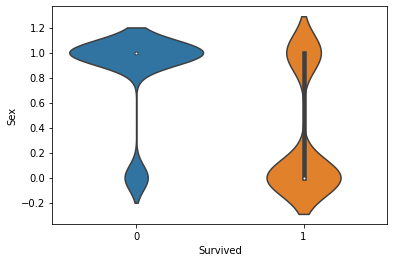

In [43]:
# 觀察重要特徵與目標的分布
# 第一名              
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x=train_Y, y=df['Sex'], fit_reg=False)
plt.show()

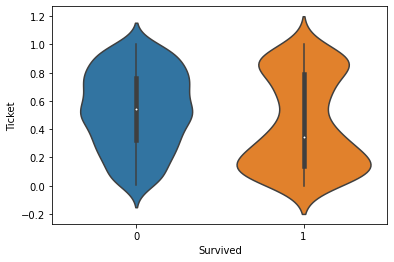

In [44]:
# 第二名       
sns.violinplot(x=train_Y, y=df['Ticket'], fit_reg=False)
plt.show()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,label
Pclass,1.000000,0.052831,0.131900,-0.359728,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511,-0.338481
Name,0.052831,1.000000,0.020314,-0.078467,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.010633,-0.057343
Sex,0.131900,0.020314,1.000000,0.023365,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492,-0.543351
Age,-0.359728,-0.078467,0.023365,1.000000,-0.182282,-0.045272,-0.071528,0.135707,0.204653,0.071928,0.012439
SibSp,0.083081,-0.017230,-0.114631,-0.182282,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480,-0.035322
Parch,0.018443,-0.049105,-0.245489,-0.045272,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351,0.081629
Ticket,0.319869,0.047348,0.059372,-0.071528,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146,-0.164549
Fare,-0.549500,-0.049173,-0.182333,0.135707,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365,0.257307
Cabin,-0.537419,0.003122,-0.137704,0.204653,-0.024829,0.033585,-0.176515,0.310987,1.000000,-0.070245,0.276235
Embarked,0.173511,-0.010633,0.118492,0.071928,0.071480,0.043351,0.011146,-0.230365,-0.070245,1.000000,-0.176509


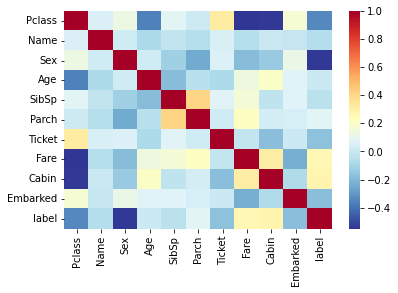

In [30]:
test = df.copy()
test['label'] = train_Y
sns.heatmap(test.corr() , cmap = plt.cm.RdYlBu_r)
test.corr()

In [31]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.000000,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.000000,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.000000,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.000000,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.000000,0.694118,0.015713,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.615730,1.0,0.345679,0.000,0.000000,0.148529,0.025374,0.000000,1.000000
887,0.0,0.340449,0.0,0.246914,0.000,0.000000,0.020588,0.058556,0.210884,1.000000
888,1.0,0.464045,0.0,0.000000,0.125,0.333333,0.992647,0.045771,0.000000,1.000000
889,0.0,0.091011,1.0,0.333333,0.000,0.000000,0.011765,0.058556,0.414966,0.333333


In [32]:
# 製作新特徵看效果
"""
Your Code Here
"""
df['sex_ticket'] = (df['Sex'] + df['Ticket']) / 2
df


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_ticket
0,1.0,0.121348,1.0,0.283951,0.125,0.000000,0.769118,0.014151,0.000000,1.000000,0.884559
1,0.0,0.213483,0.0,0.481481,0.125,0.000000,0.876471,0.139136,0.557823,0.333333,0.438235
2,1.0,0.396629,0.0,0.333333,0.000,0.000000,0.983824,0.015469,0.000000,1.000000,0.491912
3,0.0,0.305618,0.0,0.444444,0.125,0.000000,0.072059,0.103644,0.380952,1.000000,0.036029
4,1.0,0.016854,1.0,0.444444,0.000,0.000000,0.694118,0.015713,0.000000,1.000000,0.847059
...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.615730,1.0,0.345679,0.000,0.000000,0.148529,0.025374,0.000000,1.000000,0.574265
887,0.0,0.340449,0.0,0.246914,0.000,0.000000,0.020588,0.058556,0.210884,1.000000,0.010294
888,1.0,0.464045,0.0,0.000000,0.125,0.333333,0.992647,0.045771,0.000000,1.000000,0.496324
889,0.0,0.091011,1.0,0.333333,0.000,0.000000,0.011765,0.058556,0.414966,0.333333,0.505882


In [39]:
# train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, df, train_Y, cv=5).mean()

0.8372795179210344

In [42]:
estimator.fit(df , train_Y)
pd.Series(estimator.feature_importances_ , index=df.columns).sort_values(ascending=False)

sex_ticket    0.276522
Name          0.119606
Ticket        0.114240
Sex           0.111318
Fare          0.110929
Age           0.090155
Cabin         0.056126
Pclass        0.051579
SibSp         0.028545
Parch         0.023345
Embarked      0.017635
dtype: float64